### Script to plot price coefficient distribution and relationship with income

In [107]:
import pickle

# Load the results object from the file under a new name
import json
from pathlib import Path

cfg_path = Path("results_config.json")
if not cfg_path.exists():
    cfg_path = Path("post_est") / "results_config.json"
cfg = json.loads(cfg_path.read_text())
results_path = Path(cfg["results_file"])
if not results_path.is_absolute():
    results_path = (cfg_path.parent / results_path).resolve()

with open(results_path, "rb") as f:
    results = pickle.load(f)

#print(results)

Mean alpha: -33.9654
Alpha_i min: -80.1691, max: -8.6553
Alpha_i (net of mean) min: -80.1691, max: -8.6553


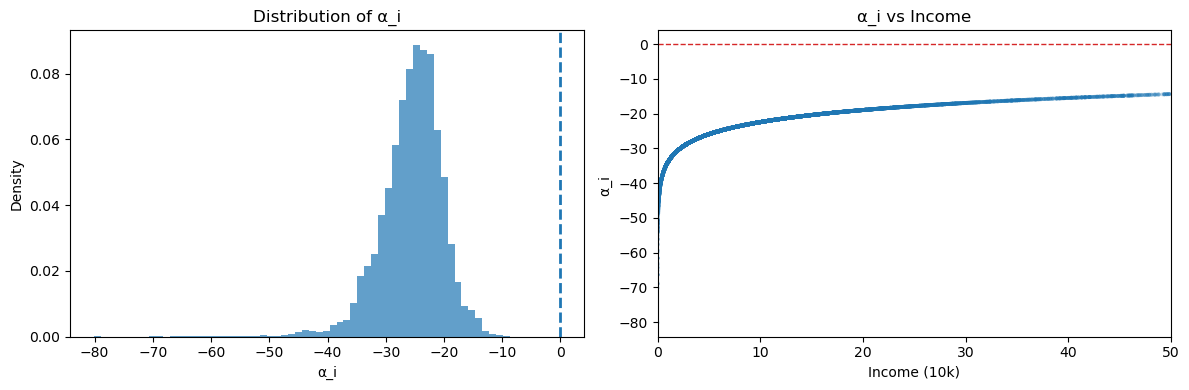

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Extract inputs from the fitted pyblp results
# ---------------------------------------------------

demographics = results.problem.agents.demographics  # (I, D)
nodes = results.problem.agents.nodes                # (I, K)

beta = results.beta
Sigma = results.sigma
Pi = results.pi

# ---------------------------------------------------
# Price coefficient index (confirm if your X1 order changes)
# ---------------------------------------------------
PRICE_IDX = 0 # <-- CHANGE IF NEEDED

# ---------------------------------------------------
# Individual price coefficients: alpha_i
#   alpha_i = beta_price + (demographics @ Pi_price) + (nodes @ Sigma_price)
# ---------------------------------------------------

beta_vec = np.asarray(beta).reshape(-1)
Sigma_arr = np.asarray(Sigma)
Pi_arr = np.asarray(Pi)

alpha_mean = float(beta_vec[0])
alpha_dem = demographics @ Pi_arr[1, :]
alpha_i = alpha_mean + alpha_dem 

print(f"Mean alpha: {alpha_mean:.4f}")
print(f"Alpha_i min: {alpha_i.min():.4f}, max: {alpha_i.max():.4f}")
print(f"Alpha_i (net of mean) min: {alpha_i.min():.4f}, max: {alpha_i.max():.4f}")

# ---------------------------------------------------
# Income axis for plots
# ---------------------------------------------------

income = None
income_label = None

if income is None:
    log_income = demographics[:, 0]
    income = np.exp(log_income)
    income_label = "Income (10k)"

# ---------------------------------------------------
# Plots: distribution and alpha_i vs income
# ---------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(alpha_i, bins=60, density=True, alpha=0.7)
axes[0].axvline(0.0, linestyle='--', linewidth=2)
axes[0].set_title("Distribution of α_i")
axes[0].set_xlabel("α_i")
axes[0].set_ylabel("Density")

axes[1].scatter(income, alpha_i, s=8, alpha=0.3, edgecolor='none')
axes[1].axhline(0.0, color='tab:red', linestyle='--', linewidth=1)
axes[1].set_title("α_i vs Income")
axes[1].set_xlabel(income_label)
axes[1].set_xlim(0, 50)
axes[1].set_ylabel("α_i ")

plt.tight_layout()
plt.show()
